# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash;  20 баллов
* Задача 3 &mdash;  25 баллов
* Задача 4 &mdash; 25 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 5 &mdash; 35 баллов


-----

In [2]:
# Bot check

# HW_ID: phds_hw9
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(palette='Set2')

### <b><i><font color="blue">Легкая часть</font></i></b> 


### Задача 1
Пусть $X = ( X_1, ... X_n)$ — выборка из неизвестного распределения $\mathsf{P} \in \{ \mathsf{P}_{\theta} | \theta \in \Theta \}$
и для проверки гипотез $\mathsf{H}_0 : \theta \in [−1, 1]$   vs.  $\mathsf{H}_1 : \theta \notin [−1, 1]$ используется критерий
$S = \{x \in \mathbb{R}^n | T(x) > 1\}$. Предположим, $T(x)$ имеет распределение $\mathcal{N}(\theta, 1)$. Какие
ответы возможны в результате проверки данных гипотез и в каких случаях? Найдите
вероятность ошибки первого рода.

*Указание:*
- Не забудьте, что в определении вероятности ошибки I рода стоит супремум по всем параметрам из основной гипотезы
- Можно показать, где достигается супремум графически. Например, с помощью `sps.norm`, где параметр `loc` отвечает за сдвиг.



Нужно в статистику $T(x)$ подставить нашу выборку: $T(X)$. Если при этом окажется, что значение статистики больше 1, то необходимо отвергнуть основную гипотезу, т.е принять, что $\theta\notin[-1, 1]$. Если же, статистика окажется меньше или равна 1, то основная гипотеза не отвергается. 

Вероятность ошибки первого рода -- это вероятность отвергнуть основную гипотезу, при том, что она на самом деле верна:
$$\sup_{\theta\in[-1, 1]}P_{\theta}(T(X) > 1) = \sup_{\theta\in[-1, 1]}P_{\theta}(\mathcal{N}(\theta, 1) > 1) = 0.5$$
Поясняющая картинака ниже

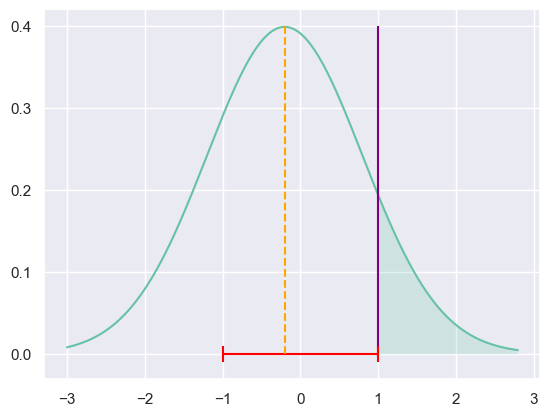

In [4]:
theta = -0.2
x_axis = np.arange(-3, theta + 3, 0.001)
x_axis1 = np.arange(1, theta + 3, 0.001)
plt.plot(x_axis, sps.norm.pdf(x_axis, theta, 1))
plt.fill_between(x_axis1,sps.norm.pdf(x_axis1, theta, 1), alpha=0.2)

plt.vlines(1, 0, 0.4, color='purple')
plt.vlines(-1, -0.01, 0.01, color='red')
plt.vlines(1, -0.01, 0.01, color='red')
plt.hlines(0, -1, 1, color='red')
plt.vlines(theta, 0, 0.4, color='orange', linestyle='dashed')
plt.show()

### Задача 2

Проведен эксперимент, получены данные из экспоненциального распределения.

In [5]:
sample = np.array(
    [
        0.11731702,
        0.75253036,
        0.32918642,
        0.22823564,
        0.04240622,
        0.04239907,
        0.01495969,
        0.50280772,
        0.22977054,
        0.30781252,
        0.00519983,
        0.87588937,
        0.44660739,
        0.05967191,
        0.05016975,
        0.05065286,
        0.09068843,
        0.18598196,
        0.14138427,
        0.08605575,
        0.23659272,
        0.03755863,
        0.08637888,
        0.1140693,
        0.15223367,
        0.384484,
        0.05568397,
        0.18050729,
        0.22437618,
        0.01189096,
    ]
)

Необходимо проверить, является ли это распределение с параметром $\lambda=2$. Используя Критерий Вальда, сделайте вывод по данному предположению.

$X_1, ... X_n$ &mdash; выборка из распределения $Exp(\lambda)$.  
Проверьте гипотезу $\mathsf{H}_0\colon \lambda = 2$ vs. $\mathsf{H}_1\colon \lambda \neq 2$  
  

 
 

**1.** Из лекции вы узнали про критерий Вальда.
Для случая двусторонней альтернативы $\mathsf{H}_1\colon \theta \neq \theta_0$ критерий имел следующий вид:
$$\large{S = \left\{ \left|\sqrt{n} \frac{\hat{\theta} - \theta_0}{\hat{\sigma}} \right| > z_{1 - \frac{\alpha}{2}} \right\}}$$

где $\hat{\theta}$ &mdash; асимптотически нормальная оценка $\theta$ с асимптотической дисперсией $\sigma^2(\theta)$, 
$\hat{\sigma}$ &mdash; состоятельная оценка $\sigma(\theta)$.  

Эквивалентный асимптотичсекий доверительный интервал для параметра $\theta$ уровня доверия $1-\alpha$
$$C = \left( \hat{\theta} - \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}, \hat{\theta} + \frac{z_{1-\alpha/2} \hat{\sigma}}{\sqrt{n}}\right)$$

На первой лекции вы получали, что $\frac{1}{\overline{X}}$ &mdash; АНО для параметра $\theta$ c асимптотической дисперсией $\theta^2$


 **Выпишите состоятельную оценку дисперсии и статистику критерия Вальда**
 
 

**Ответ:** $$W = \sqrt{n} \frac{\hat{\theta} - \theta_0}{\hat{\sigma}},\qquad\sigma = \sqrt{\frac{1}{\theta^2}} = \frac{1}{\theta},\qquad\widehat{\sigma} = \overline{X}$$

На лекции вы узнали про p-value &mdash; это вероятность получить при справедливости $H_0$ такое значение статистики $t = T(x)$ или еще более экстремальное, то есть в случае двустороннего критерия
$$p(x) = \mathsf{P}_0(T(X) \geq|t|) + \mathsf{P}_0(T(X) \leq -|t|)$$
Для расчета можно использовать функции из библиотеки `scipy.stats`.

**2**. Оформите функцию подсчета статистики критерия, p-value и доверительного интервала 

In [6]:
def wald_test(
    sample,
    theta,
    estimation_theta,
    estimation_sigma,
    alternative="two_sided",
    alpha=0.05,
):
    n = len(sample) ** 0.5
    z = sps.norm.ppf(1 - alpha / 2)

    W = n * (estimation_theta - theta) / estimation_sigma
    
    left = round(estimation_theta - z * estimation_sigma / n, 3)
    right = round(estimation_theta + z * estimation_sigma / n, 3)

    if alternative == "two_sided":
        p_value = sps.norm.sf(np.abs(W)) + sps.norm.cdf(-np.abs(W))
        confident_interval = (left, right)

    elif alternative == "less":
        p_value = sps.norm.cdf(W)
        confident_interval = (-np.inf, left)

    elif alternative == "greater":
        p_value = sps.norm.sf(W)
        confident_interval = (right, np.inf)

    else:
        raise ValueError("alternative name is wrong")

    return W, p_value, confident_interval

**3**. Проверьте гипотезу с двусторонней альтернативой.

In [7]:
estimation_theta = 1 / sample.mean()
estimation_sigma = 1 / estimation_theta

In [8]:
wald_test(
    sample=sample,
    theta=2,
    estimation_theta=estimation_theta,
    estimation_sigma=estimation_sigma,
)

(80.58843261697679, 0.0, (4.892, 5.036))

**Вывод:** Видим, что эту гипотезу нужно отвергнуть в пользу альтернативы. То есть параметр распределения вряд ли равен 2. Причём, степень уверенности в отвержении очень большая. ОЧЕНЬ

Также по ДИ можно подумать, что параметр близок к 5

**4**. Проверьте гипотезу с правосторонней альтернативой.

In [9]:
wald_test(
    sample=sample,
    theta=2,
    estimation_theta=estimation_theta,
    estimation_sigma=estimation_sigma,
    alternative='greater'
)

(80.58843261697679, 0.0, (5.036, inf))

**Вывод:** Тут видим, что опять так нашу гипотезу хорошо бы отвергнуть в пользу альтернативы. И действительно, это согласуется с предположением, сделанным на основе ДИ, о том, что наш параметр равен 5, то есть больше 2. 

**5**. Проверьте гипотезу с левосторонней альтернативой.

In [10]:
wald_test(
    sample=sample,
    theta=2,
    estimation_theta=estimation_theta,
    estimation_sigma=estimation_sigma,
    alternative='less'
)

(80.58843261697679, 1.0, (-inf, 4.892))

**Вывод:** А вот тест говорит, что вероятнее наш параметр 2, чем он меньше 2. Впрочем, и p-value -- это не вероятность того, что гипотеза верна, так что мы просто поняли, что предлагаемая альтернатива хуже. Это опять таки согласуется со сделанным ранее предположением.

Построим гистограмму, отображающую наши данные и плотности распределения с параметроми 2 и 5. Видим, что второе и правда подходит куда лучще.

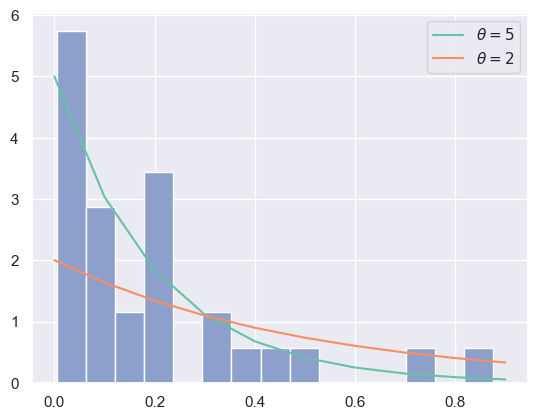

In [11]:
xs = np.arange(0, 1, 0.1)
plt.plot(xs, sps.expon.pdf(xs, scale=0.2), label=r'$\theta = 5$')
plt.plot(xs, sps.expon.pdf(xs, scale=0.5), label=r'$\theta = 2$')
plt.hist(sample, density=True, bins=15)
plt.legend()
plt.show()

Напоследок проведём тест гиптезы, что $\theta = 5$

In [12]:
wald_test(
    sample=sample,
    theta=5,
    estimation_theta=estimation_theta,
    estimation_sigma=estimation_sigma,
)

(-0.9785587819194635, 0.3277980336433053, (4.892, 5.036))

Ну вот, тут тест говорит, что такую гипотезу отвергать не стоит, даже в пользу двусторонней альтернативы

### Задача 3

На практике часто рассматривают асимптотические критерии, например, критерий Вальда. Такие критерии контролируют вероятность ошибки I рода на уровне $\alpha$ только в пределе, однако для небольших выборок она может сильно отличаться от $\alpha$, причем нередко в большую сторону. Поэтому для таких критериев возникает необходимость в вычислении значения вероятности ошибки I рода или *реального уровня значимости* при конечной выборке.

Зачастую посчитать точное значение реального уровня значимости довольно сложно, поэтому вместо него вычисляют оценку с помощью сэмплирования по методу Монте-Карло.

Пусть гипотеза $\mathsf{H}_0$ простая, то есть $\mathsf{H}_0\colon \mathsf{P} = \mathsf{P}_0$. Для ее проверки по конечной выборке $X_1, ..., X_n$ используется критерий $S$. **Опишите схему оценки реального уровня** значимости критерия $S$ методом Монте-Карло.


**Ответ:** Алгоритм действий такой:
1. Генерируем множество выборок $X_n, n = \overline{1, N}$ из распределения $P_0$

2. Для каждой выборки проверяем критерий: лежит ли $X_n$ в $S$

3. Оцениваем реальный уровень значимости как среднее число выборок, для которых критерий выполнился: $\frac{\sum_{i=1}^{N}\mathbb I(X_i\in S)}{N}$

Если гипотеза $\mathsf{H}_0$ сложная, то есть $\mathsf{H}_0\colon \mathsf{P} \in \mathscr{P}_0$, то можно повторить такую процедуру несколько раз для разных $\mathsf{P} \in \mathscr{P}_0$.

Рассмотрим альтернативную гипотезу $\mathsf{H}_1\colon \mathsf{P} \in \mathscr{P}_1$. **Опишите схему оценки мощности** критерия $S$ методом Монте-Карло.

**Ответ:** Мощность -- это $1 - \mathbb{P}(2\text{ рода})$. То есть нам нужно оценить $\mathbb{P}(X\in S|\mathsf{P} \in \mathscr{P}_1)$. Таким образом необходимо выбрать несколько функций распределения ($P_i\in\mathscr{P}_1,~i = \overline{1, K}$). Для каждой конкретной ф.р. проделать процедуру, описанную выше. А затем взять максимум из результатов

Пусть $X_1, ..., X_n$ &mdash; выборка из пуассоновского распределения с параметром $\theta$. Рассмотрим гипотезы $\mathsf{H}_0\colon \theta = 1\ \ vs.\ \ \mathsf{H}_1\colon \theta \not= 1$ и критерий Вальда для их проверки.

**1.** **Оцените реальный уровень значимости** критерия для $ n = 50$.

In [13]:
mu = 1
sample_count = 500
sample = sps.poisson.rvs(size=(sample_count, 50), mu=mu)

estimation_theta = sample.mean(axis=1)
estimation_sigma = estimation_theta

counter = 0
for i in range(sample_count):
    _, p_value, conf_int = wald_test(sample[i], mu, estimation_theta[i], estimation_sigma[i])
    is_rejected = p_value <= 0.05
    if is_rejected:
        counter += 1
        
counter / sample_count

0.076

**Вывод:** Получили реальный уровень значимости 0.68 -- довольно близкий к 0.05, хотя и побольше. Интересно было бы поисследовать его скорость сходимости в зависимости от числа элементов в выборке.

C:\Users\Dima\AppData\Local\Temp\ipykernel_20064\449184018.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  W = n * (estimation_theta - theta) / estimation_sigma


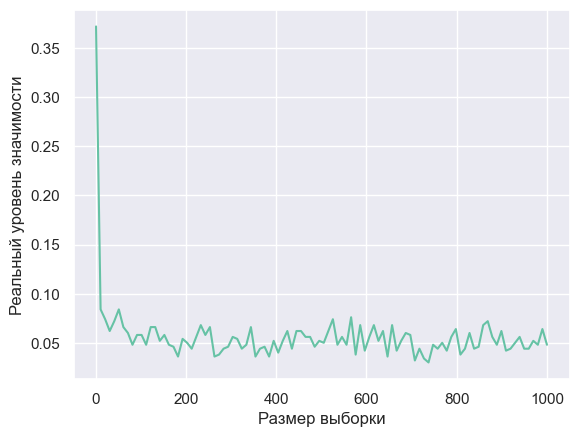

In [14]:
alphas = []
sample_count = 500
for sample_size in range(1, 1000, 10):
    mu = 1
    sample = sps.poisson.rvs(size=(sample_count, sample_size), mu=mu)

    estimation_theta = sample.mean(axis=1)
    estimation_sigma = estimation_theta

    counter = 0
    for i in range(1, sample_count):
        _, p_value, conf_int = wald_test(sample[i], mu, estimation_theta[i], estimation_sigma[i])
        is_rejected = p_value <= 0.05
        if is_rejected:
            counter += 1
            
    alphas.append(counter / sample_count)
    
plt.plot(np.linspace(1, 1000, 100), alphas)
plt.xlabel('Размер выборки')
plt.ylabel('Реальный уровень значимости')
plt.show()

И правда сходится к 0.05, причём довольно быстро

**2.** Пусть $n=50$. **Сравните мощности критериев**, соответствующих двусторонней, левосторонней и правосторонней альтернативам при $\theta=0.2$ и при $\theta=2$.

In [15]:
def calculate_alpha(mu, alternative):
    sample_count = 500
    sample = sps.poisson.rvs(size=(sample_count, 50), mu=mu)

    estimation_theta = sample.mean(axis=1)
    estimation_sigma = estimation_theta

    counter = 0
    for i in range(sample_count):
        _, p_value, _ = wald_test(sample[i], mu, estimation_theta[i], estimation_sigma[i], alternative=alternative)
        if p_value <= 0.05:
            counter += 1
            
    return counter / sample_count

Двусторонняя альтернатива

In [16]:
mu = 0.2
mu_left = np.linspace(0, mu - 0.05, 20)
mu_right = np.linspace(mu + 0.05, 5, 20)

l_alpha = []
r_alpha = []
lr_alpha = []

for mu in mu_left:
    l_alpha.append(calculate_alpha(mu, "less"))
    lr_alpha.append(calculate_alpha(mu, "two_sided"))
    
for mu in mu_right:
    r_alpha.append(calculate_alpha(mu, "greater"))
    lr_alpha.append(calculate_alpha(mu, "two_sided"))

l_alpha = np.array(l_alpha)
r_alpha = np.array(r_alpha)
lr_alpha = np.array(lr_alpha)
print(f'Мощность левосторонней альтернативы: {l_alpha.mean()}')
print(f'Мощность правосторонней альтернативы: {r_alpha.mean()}')
print(f'Мощность двусторонней альтернативы: {lr_alpha.mean()}')

C:\Users\Dima\AppData\Local\Temp\ipykernel_20064\449184018.py:12: RuntimeWarning: invalid value encountered in scalar divide
  W = n * (estimation_theta - theta) / estimation_sigma
C:\Users\Dima\AppData\Local\Temp\ipykernel_20064\449184018.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  W = n * (estimation_theta - theta) / estimation_sigma


Мощность левосторонней альтернативы: 0.3773
Мощность правосторонней альтернативы: 0.013600000000000001
Мощность двусторонней альтернативы: 0.30245


In [17]:
mu = 2
mu_left = np.linspace(0, mu - 0.1, 20)
mu_right = np.linspace(mu + 0.1, 5, 20)

l_alpha = []
r_alpha = []
lr_alpha = []

for mu in mu_left:
    l_alpha.append(calculate_alpha(mu, "less"))
    lr_alpha.append(calculate_alpha(mu, "two_sided"))
    
for mu in mu_right:
    r_alpha.append(calculate_alpha(mu, "greater"))
    lr_alpha.append(calculate_alpha(mu, "two_sided"))

l_alpha = np.array(l_alpha)
r_alpha = np.array(r_alpha)
lr_alpha = np.array(lr_alpha)
print(f'Мощность левосторонней альтернативы: {l_alpha.mean()}')
print(f'Мощность правосторонней альтернативы: {r_alpha.mean()}')
print(f'Мощность двусторонней альтернативы: {lr_alpha.mean()}')

C:\Users\Dima\AppData\Local\Temp\ipykernel_20064\449184018.py:12: RuntimeWarning: invalid value encountered in scalar divide
  W = n * (estimation_theta - theta) / estimation_sigma
C:\Users\Dima\AppData\Local\Temp\ipykernel_20064\449184018.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  W = n * (estimation_theta - theta) / estimation_sigma


Мощность левосторонней альтернативы: 0.1243
Мощность правосторонней альтернативы: 0.0002
Мощность двусторонней альтернативы: 0.05720000000000001


**Вывод:** Видим, что двусторонний критерий менее мощный, чем односторонний



### Задача 4

**Профиль физика**

Период колебания математического маятника можно расчиатать по следующей формуле:
$$T = 2\pi \sqrt{\frac{l}{g}}$$
Вы выполнили лабораторную работу по вычислению ускорения свободного падения. Длина нити маятника 50 см. В своей работе вы измеряли время 10 полных колебаний (10 периодов) с помощью обычного секундомера и получили такие значение: 




In [18]:
T_sample = [14.47, 14.46, 14.73, 14.74, 16.14, 12.6, 14.17, 12.83, 14.1, 12.81, 12.98, 
            13.84, 13.96, 13.6, 14.13, 15.32, 13.98, 13.96, 12.86, 15.46, 13.2, 15.26, 
            14.86, 14.49, 14.8, 12.92, 14.65, 14.47, 15.88, 15.04, 14.84, 15.12, 12.96, 
            16.2, 11.99, 15.57, 13.55, 13.16, 14.76, 13.79, 12.58, 14.61, 14.1, 14.54, 
            14.72, 14.87, 13.37, 14.04, 13.09, 14.7]

Получите массив величин g, используя формулу выше.

In [19]:
g = 200 * np.pi ** 2 / np.power(T_sample, 2)

Предположим, такие величины имеют нормальное распределение $\mathcal{N}(a, \sigma^2)$. Используйте критерий Вальда для проверки гипотезы $\mathsf{H}_0: a = 9.81$ vs $\mathsf{H}_1: a \neq 9.81$

В качесте оценки среднего возьмём выборочное среднее, а в качестве оценки дисперсии -- выборочную дисперсию:
$$\widehat{a} = \overline{X},\qquad\widehat{\sigma} = S = \sqrt{\overline{X^2} - \overline{X}^2}$$

In [20]:
estimation_a = g.mean()
estimation_sigma = (np.power(g, 2).mean() - estimation_a ** 2) ** 0.5

wald_test(
    sample=sample,
    theta=9.81,
    estimation_theta=estimation_a,
    estimation_sigma=estimation_sigma,
)

(2.267224448176054, 0.023376518061216, (9.829, 10.075))

**Вывод:** Как видим, критерий говорит, что гипотеза достаточно хорошо, чтобы можно было её рассматривать. Однако, тут стоит обратить внимание на широкий ДИ. Также, например, можно проверить накую гипотезу: $\mathsf{H}_0: a = 10$ vs $\mathsf{H}_1: a \neq 10$ и увидеть, что её тоже отвергать не стоит. Поэтому делаем вывод, что гипотеза достаточно хороша, но не останавливаемся на этом. Ещё, мне кажется, что есть некая проблема с нашей гипотезой в том, что , по-сути, мы просто не намерили g с такой точностью, на которую претендуем в гипотезе. Поэтому она немного дурацкая. Точно так же можно было бы написать хоть 100 знаков после запятой и результат был бы прежним, хотя знаки эти были бы выдуманны из головы. Так что, в каком-то смысле результат этого теста немного неинформативен и может ввести читателей в заблуждение. Мне кажется, разумнее было бы оставить 1 знак после запятой или обойтись целым значением

In [21]:
estimation_a = g.mean()
estimation_sigma = (np.power(g, 2).mean() - estimation_a ** 2) ** 0.5

wald_test(
    sample=sample,
    theta=10,
    estimation_theta=estimation_a,
    estimation_sigma=estimation_sigma,
)

(-0.7610829961375778, 0.4466074960180797, (9.829, 10.075))

Ну вот, тоже выше уровня значимости

### <b><i><font color="orange">Сложная часть</font></i></b>


###  Задача 5
1. Пусть $X = ( X_1, ... X_n)$ — выборка из неизвестного распределения $\mathsf{P} \in \mathcal{N}(a, \sigma^2)$. Постройте критерий для проверки гипотез $\mathsf{H}_0 : a = 0 $   vs.  $\mathsf{H}_1 : a > 0$ уровня значимости $\alpha$.

Бонусный сложный пункт: получите выражение для p-value аналогично правостороннему критерию Вальда

*Указание:*
- Используйте статистику $T(X) = \sqrt{n - 1} \frac{\overline{X}}{s}$, использовавшуюся при построении точных доверительных интервалов в нормальной модели. Какое распределение она имеет при справедливости $\mathsf{H}_0$ (т.е. при $a = 0$)? 
- Подумайте, какой вид должен иметь критерий? При каких значениях $T(X)$ гипотезу $\mathsf{H}_0$ разумно отвергать?
- Этот критерий реализован в `scipy.stats.ttest_1samp`. Использовать для данной задачи его можно следующим образом: `sps.ttest_1samp(sample, popmean=0, alternative='greater')`. В результате применения функция вернет значение статистики критерия, p-value и количество степеней свободы. Вы можете проверить свой ответ с ее помощью.

$$T(X) = \sqrt{n - 1}\frac{\overline{X}}{S} = \sqrt{n}\frac{\overline{X}}{\sqrt{\frac{n}{n - 1}S^2}} = \sqrt{n}\frac{\overline{X} - 0}{\widehat{\sigma}}$$
Воспользуемся ЦПТ:
$$T(X) = \sqrt{n}\frac{\overline{X} - 0}{\widehat{\sigma}} \rightarrow \mathcal{N}(0, 1)$$
Эта сходимость есть, если $X$ действительно пришла из нормального распределения со средним $0$. В ином случае:
$$T(X) = \sqrt{n}\frac{\overline{X} - a + a}{\widehat{\sigma}} = \sqrt{n}\frac{\overline{X} - a}{\widehat{\sigma}} + \sqrt{n}\frac{a}{\widehat{\sigma}}$$
$$T(X) - \sqrt{n}\frac{a}{\widehat{\sigma}} \rightarrow \mathcal{N}(0, 1)$$
$$T(X) \rightarrow \mathcal{N}(\sqrt{n}\frac{a}{\widehat{\sigma}}, 1)$$
То есть при отклонении среднего истинного распределения от $0$ рпспределение статистики $T$ "поедет" вправо. Иными словами, только в случае, если верна основная гипотеза распределение статистики $T$ будет стандартным нормальным распределением.

Исходя из этих рассуждений, логично взять в качестве критерия такую область $S = \left\{X:~T(X)>C_\alpha\right\}$

На графике -- зелёная площадь символизирует ошибку 1 рода и численно равна вероятности её совершить, а оранжевая то же для ошибки 2 рода. Таким образом, мощность критерия -- это оставшеяся незакрашенной площадь под оранжевой кривой (1 - вероятность ошибки 2 рода)

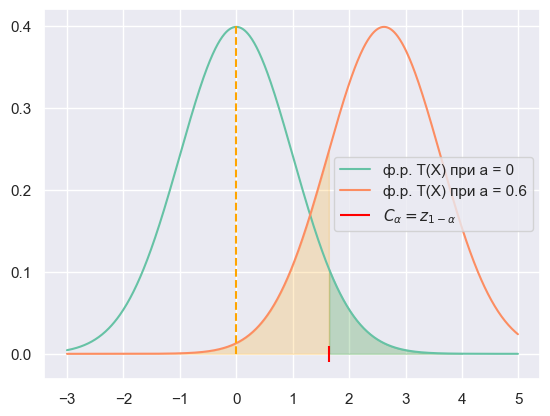

In [57]:
a = 0.6
alpha = 0.05

x_axis = np.arange(-3, 5, 0.01)
sample = sps.norm.rvs(size=100, loc=a, scale=2)
S = (np.power(sample, 2).mean() - sample.mean() ** 2) ** 0.5
z = sps.norm.ppf(1 - alpha)
error1 = np.arange(z, 4, 0.01)
error_2 = np.arange(-3, z, 0.01)

plt.plot(x_axis, sps.norm.pdf(x_axis, 0, 1), label=r"ф.р. T(X) при a = 0")
plt.plot(x_axis, sps.norm.pdf(x_axis, (len(sample) - 1) ** 0.5 * a / S, 1), label=r"ф.р. T(X) при a = 0.6")
plt.fill_between(error1, sps.norm.pdf(error1, 0, 1), alpha=0.2, color='green')
plt.fill_between(error_2, sps.norm.pdf(error_2, (len(sample) - 1) ** 0.5 * a / S, 1), alpha=0.2, color='orange')

plt.vlines(z, -0.01, 0.01, color='red', label=r"$C_\alpha = z_{1 - \alpha}$")
plt.vlines(0, 0, 0.4, color='orange', linestyle='dashed')
plt.legend()
plt.show()

$C_\alpha$ подбирается из условия на уровень значимости -- вероятность ошибки 1 рода: 
$$\mathbb{P}(T(X) > C_\alpha|a = 0) = \alpha\quad\Rightarrow\quad C_\alpha = z_{1-\alpha}$$
Тогда критерий и вероятность ошибки первого рода переписывабтся следующим образом:
$$S = \left\{X:~T(X)>z_{1-\alpha}\right\},\quad\mathbb{P}(T(X) > z_{1-\alpha}|a = 0) = \alpha$$

Однак, это всё верно только в пределе. На самом же деле дело обстоит так.
$$T(X) = \sqrt{n - 1}\frac{\overline{X}}{S} = \frac{(\overline{X} - 0)\frac{\sqrt{n}}{\sigma}}{\frac{S}{\sigma}\cdot\frac{\sqrt{n}}{\sqrt{n - 1}}} = \sqrt{n - 1}\frac{(\overline{X} - 0)\frac{\sqrt{n}}{\sigma}}{\sqrt{n}\sqrt{\frac{S^2}{\sigma^2}}} = \sqrt{n - 1}\frac{(\overline{X} - 0)\frac{\sqrt{n}}{\sigma}}{\sqrt{\frac{(nS)^2}{\sigma^2}}}$$
Уф...
Величина в числителе при $a = 0$ распределена как $\mathcal{N}(0, 1)$:
$$\overline{X}\backsim\mathcal{N}(0, \frac{\sigma^2}{n})$$
$$\overline{X} - 0\backsim\mathcal{N}(0, \frac{\sigma^2}{n})$$
$$\frac{\overline{X} - 0}{\frac{\sigma}{\sqrt{n}}}\backsim\mathcal{N}(0, 1)$$
В знаменателе величина распределена как $\mathcal{\chi}^2(n - 1)$. Таким образом мы можем заключить, что наша статичтика $T(X)$ имеер распределение Стьюдента с $n - 1$ степенью свободы. Так что, действительно в пределе оно превращается в $\mathcal{N}(0, 1)$

Таким образом, при справедливости гипотезы наша статистика имеет распределение Стьюдента, а в другом случае -- нет. Мне лень проверять, какое, но могу предположить, что нецентрированное распределение Стьюдента. Поэтому все рассуждения сделанные выше остаются верными, за исключением предположения, что ф.р. статистики такая же как у с.н.р.

Чтобы построить теперь точный критерий, а не асимптотический следует заменить квантиль нормального распределения на квантиль распределения стьюдента:
$$S = \left\{X:~T(X)>t_{1-\alpha}\right\},\quad\mathbb{P}(T(X) > t_{1-\alpha}|a = 0) = \alpha$$

Построим также выражение для p-value:
$$p_{value}(t) = \mathbb{P}(T(X) > t|~a = 0) = 1 - \Phi(t)$$
Проиллюстрируем это картинкой

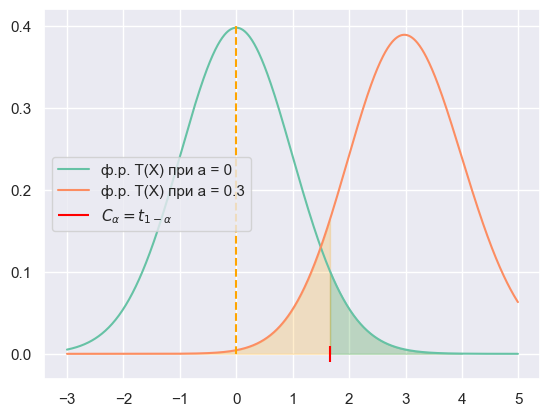

In [149]:
n = 100
a = 0.3
sigma = 1
alpha = 0.05
df = n - 1

sample = sps.norm.rvs(size=n, loc=a, scale=sigma)
S = (np.power(sample, 2).mean() - sample.mean() ** 2) ** 0.5
c = a * n ** 0.5 / sigma

def T(x, nc=c, df=df):
    return sps.nct.pdf(x, nc=nc, df=df)

z = sps.nct.ppf(1 - alpha, nc=0, df=df)

x_axis = np.arange(-3, 5, 0.01)
error_1 = np.arange(z, 4, 0.01)
error_2 = np.arange(-3, z, 0.01)

plt.plot(x_axis, T(x_axis, nc=0), label=f"ф.р. T(X) при a = 0")
plt.plot(x_axis, T(x_axis), label=f"ф.р. T(X) при a = {a}")

plt.fill_between(error_1, T(error_1, nc=0, df=df), alpha=0.2, color='green')
plt.fill_between(error_2, T(error_2, df=df), alpha=0.2, color='orange')

plt.vlines(z, -0.01, 0.01, color='red', label=r"$C_\alpha = t_{1 - \alpha}$")
plt.vlines(0, 0, 0.4, color='orange', linestyle='dashed')
plt.legend()
plt.show()

Напишем свою функцию этого теста

In [150]:
def my_test(
    sample,
    alpha=0.05,
):
    df = len(sample) - 1
    n = (df) ** 0.5
    estimation_a = sample.mean()
    estimation_sigma = (np.power(sample, 2).mean() - sample.mean() ** 2) ** 0.5
    z = sps.t.ppf(1 - alpha, df=df)

    T = n * estimation_a / estimation_sigma
    
    left = round(estimation_a - z * estimation_sigma / n, 3)
    right = np.inf

    p_value = sps.t.sf(T, df=df)
    confident_interval = (left, right)

    return T, p_value, confident_interval

Сгененрируем выборки из нормального распределения с различными параметрами и сравним в каждом случае значение статистик и p-value, выдаваемые нашей функцией и функцией из sps

In [151]:
params = [(0, 1), (0, 5), (5, 1), (5, 5)]
for a, sigma in params:
    sample = sps.norm.rvs(size=100, loc=a, scale=sigma)
    my_t = my_test(sample)
    sps_t = sps.ttest_1samp(sample, popmean=0, alternative='greater')
    print(f'a = {a}\nsigma = {sigma}')
    print(f'my\t| p-value: {my_t[1]} \t|\tT: {my_t[0]}')
    print(f'sps\t| p-value: {sps_t.pvalue}\t|\tT: {sps_t.statistic}')
    print()


a = 0
sigma = 1
my	| p-value: 0.9337273744959005 	|	T: -1.5166363164345968
sps	| p-value: 0.9337273744959005	|	T: -1.5166363164345966

a = 0
sigma = 5
my	| p-value: 0.9804606127671834 	|	T: -2.0911085587582376
sps	| p-value: 0.9804606127671835	|	T: -2.091108558758238

a = 5
sigma = 1
my	| p-value: 1.6648244048908455e-70 	|	T: 47.79811878260427
sps	| p-value: 1.664824404891082e-70	|	T: 47.798118782604206

a = 5
sigma = 5
my	| p-value: 4.451858948801921e-15 	|	T: 9.123923824277504
sps	| p-value: 4.451858948801921e-15	|	T: 9.123923824277506



Видимо, угадали

2. Пусть  $X = ( X_1, ... X_n)$ &mdash; выборка из неизвестного распределения $\mathsf{P}$ с конечным вторым моментом. Постройте асимптотический критерий для проверки гипотез $\mathsf{H}_0 \colon \mathsf{E} X = 0 $   vs.  $\mathsf{H}_1 \colon \mathsf{E} X > 0$ уровня значимости $\alpha$. Покажите, что при $n \to \infty$ этот критерий совпадает с критерием из первого пункта.